In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Load the CSV file
df = pd.read_csv("../data/data.csv")

# Group the data by customer ID
grouped_data = df.groupby('CustomerId')

In [3]:
df['TransactionId'] = df['TransactionId'].str.extract('(\d+)') # Extract only numeric part
df['BatchId'] = df['BatchId'].str.extract('(\d+)') # Extract only numeric part
df['AccountId'] = df['AccountId'].str.extract('(\d+)') # Extract only numeric part
df['SubscriptionId'] = df['SubscriptionId'].str.extract('(\d+)') # Extract only numeric part
df['CustomerId'] = df['CustomerId'].str.extract('(\d+)') # Extract only numeric part
df['ProviderId'] = df['ProviderId'].str.extract('(\d+)') # Extract only numeric part
df['ProductId'] = df['ProductId'].str.extract('(\d+)') # Extract only numeric part
df['ChannelId'] = df['ChannelId'].str.extract('(\d+)') # Extract only numeric part


In [4]:
# Create aggregate features
aggregate_df = df.groupby('CustomerId').agg({
    'Value': ['sum', 'mean', 'count', 'std']
})

In [5]:
# Rename the columns
aggregate_df.columns = ['Total Transaction Value', 'Average Transaction Value', 'Transaction Count', 'Standard Deviation of Transaction Values']

# Fill NaN values with 0
aggregate_df['Standard Deviation of Transaction Values'] = aggregate_df['Standard Deviation of Transaction Values'].fillna(0)


In [6]:
# Display the aggregate features
aggregate_df

,Total Transaction Value,Average Transaction Value,Transaction Count,Standard Deviation of Transaction Values
CustomerId,,,,
1,10000,10000.000000,1,0.000000
10,10000,10000.000000,1,0.000000
1001,30400,6080.000000,5,4100.243895
1002,4775,434.090909,11,518.805446
1003,32000,5333.333333,6,3945.461528
...,...,...,...,...
992,32000,5333.333333,6,4033.195590
993,32000,6400.000000,5,3781.534080
994,614077,6079.970297,101,14537.733039


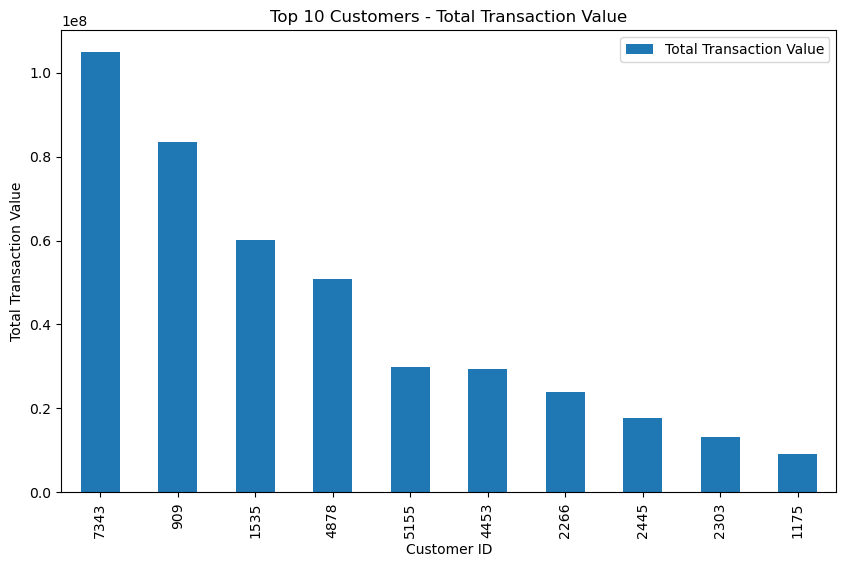

In [7]:
# Plotting the top 10 customers with the highest Total Transaction Value
top_10_total_value = aggregate_df.nlargest(10, 'Total Transaction Value')
top_10_total_value.plot(kind='bar', y='Total Transaction Value', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Value')
plt.title('Top 10 Customers - Total Transaction Value')
plt.show()


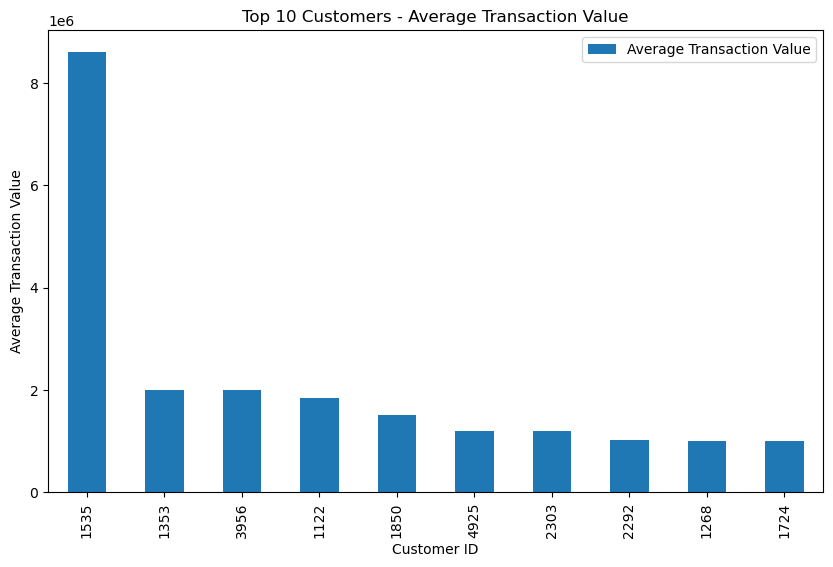

In [8]:
# Plotting the top 10 customers with the highest Average Transaction Value
top_10_average_value = aggregate_df.nlargest(10, 'Average Transaction Value')
top_10_average_value.plot(kind='bar', y='Average Transaction Value', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Average Transaction Value')
plt.title('Top 10 Customers - Average Transaction Value')
plt.show()

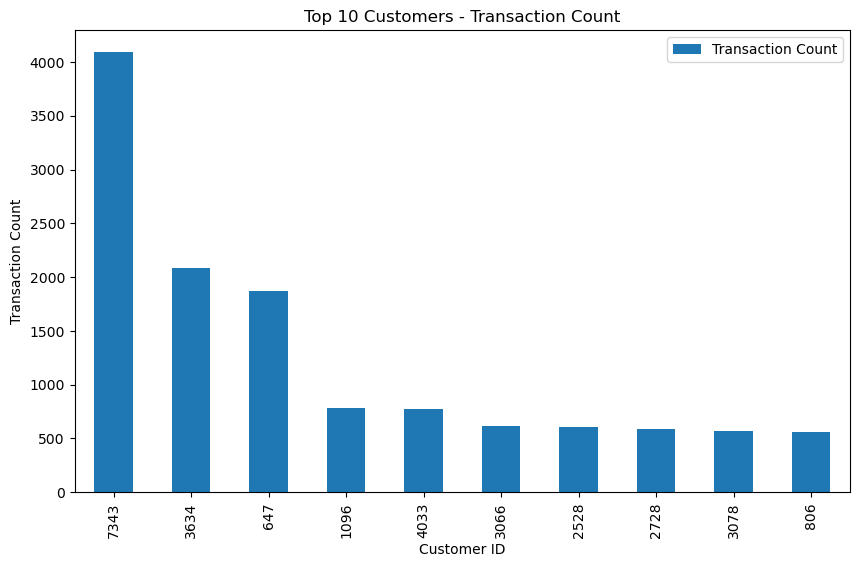

In [9]:
# Plotting the top 10 customers with the highest Transaction Count
top_10_transaction_count = aggregate_df.nlargest(10, 'Transaction Count')
top_10_transaction_count.plot(kind='bar', y='Transaction Count', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.title('Top 10 Customers - Transaction Count')
plt.show()


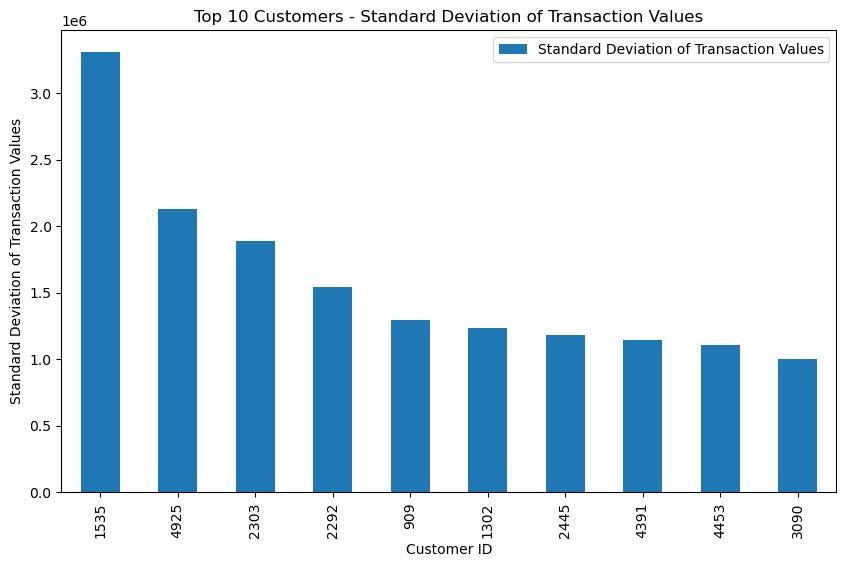

In [10]:
# Plotting the top 10 customers with the highest Standard Deviation of Transaction Values
top_10_std_dev = aggregate_df.nlargest(10, 'Standard Deviation of Transaction Values')
top_10_std_dev.plot(kind='bar', y='Standard Deviation of Transaction Values', figsize=(10, 6))
plt.xlabel('Customer ID')
plt.ylabel('Standard Deviation of Transaction Values')
plt.title('Top 10 Customers - Standard Deviation of Transaction Values')
plt.show()

In [11]:
# Convert the date-time column to datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract the Transaction Hour, Transaction Day, Transaction Month, and Transaction Year
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

In [12]:

# Display the updated DataFrame with the extracted features
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,UGX,256,4,6,financial_services,2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0,9,13,2,2019
95658,91597,3503,3439,2643,3874,UGX,256,6,10,airtime,3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0,9,13,2,2019
95659,82501,118602,4841,3829,3874,UGX,256,4,6,financial_services,2,-20.0,20,2019-02-13 09:54:35+00:00,2,0,9,13,2,2019
95660,136354,70924,1346,652,1709,UGX,256,6,19,tv,3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0,10,13,2,2019


In [15]:
# Group by TransactionHour and calculate the sum of TransactionAmount
hourly_transactions = df.groupby('TransactionHour')['Value'].sum()

# Find the hour with the highest total transaction amount
max_hour = hourly_transactions.idxmax()


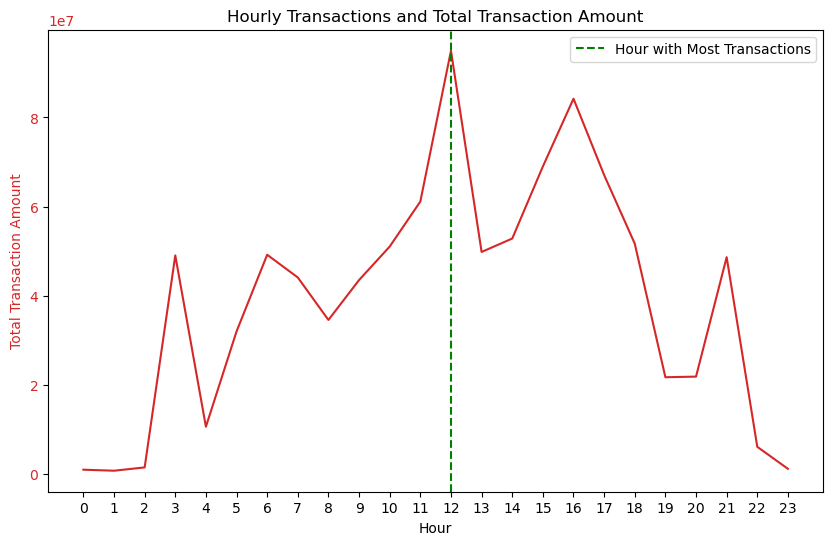

In [16]:
# Plotting the hourly transactions and total transaction amount
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the total transaction amount
color = 'tab:red'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Total Transaction Amount', color=color)
ax1.plot(hourly_transactions.index, hourly_transactions.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plotting the hour with the highest total transaction amount
ax1.axvline(max_hour, color='green', linestyle='--', label='Hour with Most Transactions')
ax1.legend()

# Adding labels and title
plt.title('Hourly Transactions and Total Transaction Amount')
plt.xticks(hourly_transactions.index)
plt.xlabel('Hour')

# Display the plot
plt.show()

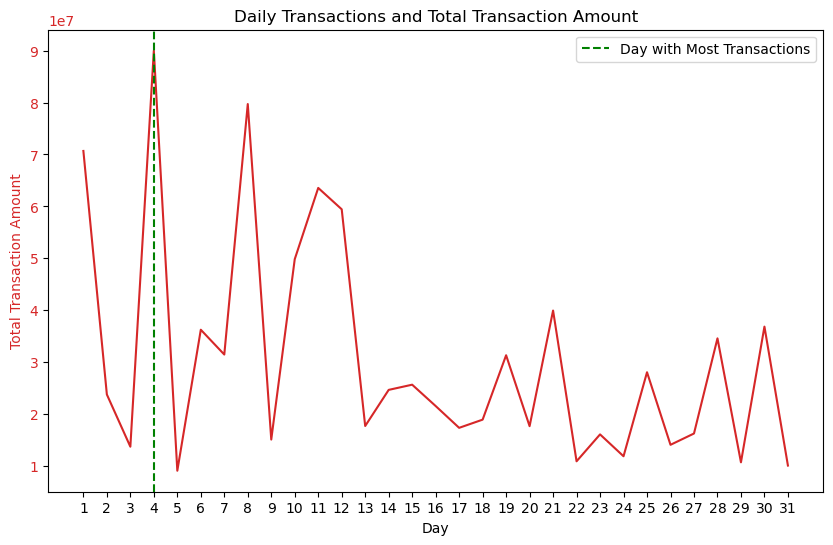

In [17]:
# Group by TransactionDay and calculate the sum of TransactionAmount
daily_transactions = df.groupby('TransactionDay')['Value'].sum()

# Find the day with the highest total transaction amount
max_day = daily_transactions.idxmax()

# Plotting the daily transactions and total transaction amount
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the total transaction amount
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Transaction Amount', color=color)
ax1.plot(daily_transactions.index, daily_transactions.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plotting the day with the highest total transaction amount
ax1.axvline(max_day, color='green', linestyle='--', label='Day with Most Transactions')
ax1.legend()

# Adding labels and title
plt.title('Daily Transactions and Total Transaction Amount')
plt.xticks(daily_transactions.index)
plt.xlabel('Day')

# Display the plot
plt.show()

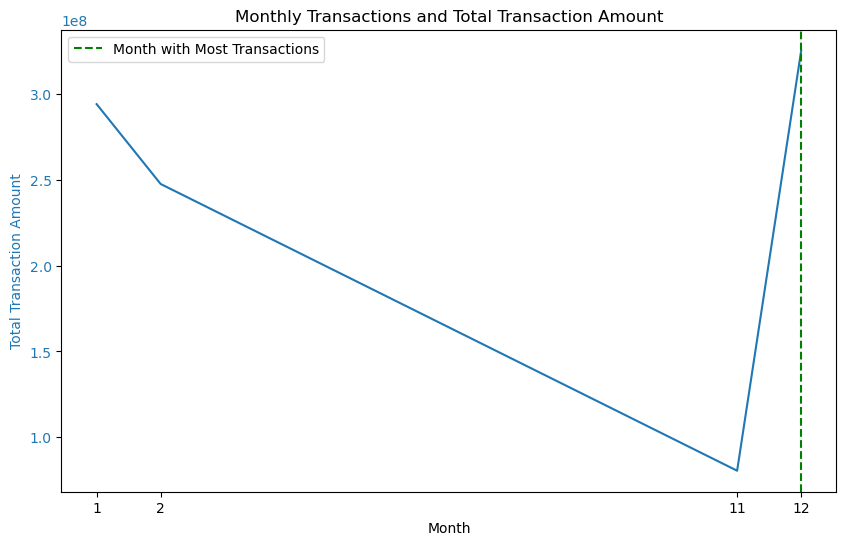

In [18]:
# Group by TransactionMonth and calculate the sum of TransactionAmount
monthly_transactions = df.groupby('TransactionMonth')['Value'].sum()

# Find the month with the highest total transaction amount
max_month = monthly_transactions.idxmax()

# Plotting the monthly transactions and total transaction amount
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plotting the total transaction amount
color = 'tab:blue'
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Transaction Amount', color=color)
ax2.plot(monthly_transactions.index, monthly_transactions.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plotting the month with the highest total transaction amount
ax2.axvline(max_month, color='green', linestyle='--', label='Month with Most Transactions')
ax2.legend()

# Adding labels and title
plt.title('Monthly Transactions and Total Transaction Amount')
plt.xticks(monthly_transactions.index)
plt.xlabel('Month')

# Display the plot
plt.show()

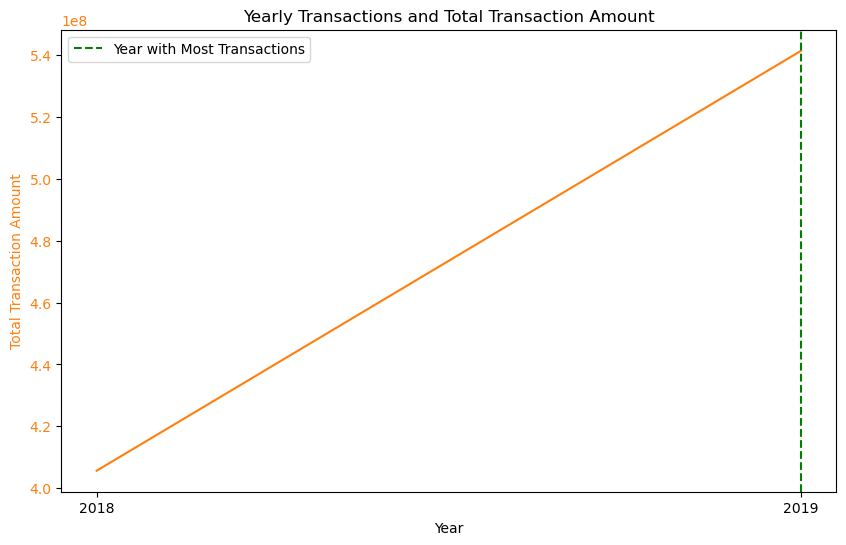

In [19]:
# Group by TransactionYear and calculate the sum of TransactionAmount
yearly_transactions = df.groupby('TransactionYear')['Value'].sum()

# Find the year with the highest total transaction amount
max_year = yearly_transactions.idxmax()

# Plotting the yearly transactions and total transaction amount
fig, ax3 = plt.subplots(figsize=(10, 6))

# Plotting the total transaction amount
color = 'tab:orange'
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Transaction Amount', color=color)
ax3.plot(yearly_transactions.index, yearly_transactions.values, color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Plotting the year with the highest total transaction amount
ax3.axvline(max_year, color='green', linestyle='--', label='Year with Most Transactions')
ax3.legend()

# Adding labels and title
plt.title('Yearly Transactions and Total Transaction Amount')
plt.xticks(yearly_transactions.index)
plt.xlabel('Year')

# Display the plot
plt.show()

Encode Categorical Variables

In [20]:
# Select the columns containing categorical values
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']


In [21]:
# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [22]:
# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = one_hot_encoder.fit_transform(df[categorical_cols])


c:\Users\huawei\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
# Create column names for encoded columns
encoded_col_names = []
for col in categorical_cols:
    unique_vals = df[col].unique()
    for val in unique_vals[1:]:
        encoded_col_names.append(f"{col}_{val}")

In [24]:
# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

# Concatenate the encoded columns with the original dataframe
encoded_data = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)


In [25]:
# Save the encoded data to a new CSV file
encoded_data.to_csv("encoded_output.csv", index=False)

Handle Missing Values


In [26]:
# Find columns with empty values
empty_cols = df.columns[df.isnull().any()]

# Find rows with empty values
empty_rows = df[df.isnull().any(axis=1)]

In [27]:
# Display columns with empty values
print("Columns with empty values:")
print(empty_cols)


Columns with empty values:
Index([], dtype='object')


In [28]:
# Display rows with empty values
print("\nRows with empty values:")
print(empty_rows)


Rows with empty values:
Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult, TransactionHour, TransactionDay, TransactionMonth, TransactionYear]
Index: []


There is no Empty column or rows i get but if we get we can use Imputation method or removing theem if they are small 

In [ ]:
# Select the columns with missing values
cols_with_missing_values = df.columns[df.isnull().any()]

In [ ]:
# Impute missing values using SimpleImputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df[cols_with_missing_values]), columns=cols_with_missing_values)

In [ ]:
# Impute missing values using SimpleImputer with median strategy
median_imputer = SimpleImputer(strategy='median')
data_median_imputed = pd.DataFrame(median_imputer.fit_transform(df[cols_with_missing_values]), columns=cols_with_missing_values)

In [ ]:
# Impute missing values using SimpleImputer with mode strategy
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(df[cols_with_missing_values]), columns=cols_with_missing_values)

In [ ]:
# Impute missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df[cols_with_missing_values]), columns=cols_with_missing_values)


In [ ]:
# Display the imputed dataframes
print("Mean Imputation:")
print(data_mean_imputed.head())
print("\nMedian Imputation:")
print(data_median_imputed.head())
print("\nMode Imputation:")
print(data_mode_imputed.head())
print("\nKNN Imputation:")
print(data_knn_imputed.head())

Normalization and standardization

In [29]:
# Select the numerical columns for scaling
numerical_cols = ['Amount', 'Value']

In [30]:
# Normalize the data to a range of [0, 1]
normalizer = MinMaxScaler()
normalized_data = pd.DataFrame(normalizer.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [31]:
# Standardize the data to have a mean of 0 and a standard deviation of 1
standardizer = StandardScaler()
standardized_data = pd.DataFrame(standardizer.fit_transform(df[numerical_cols]), columns=numerical_cols)


In [32]:
# Display the normalized data
print("Normalized Data:")
print(normalized_data.head())


Normalized Data:
     Amount     Value
0  0.092004  0.000101
1  0.091910  0.000002
2  0.091958  0.000050
3  0.093750  0.002206
4  0.091853  0.000065


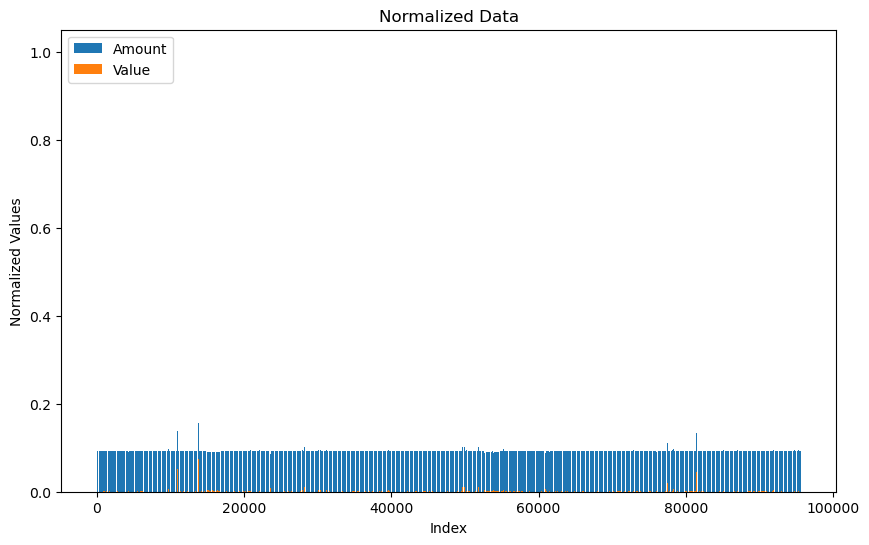

In [34]:
# Plotting the normalized data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(normalized_data.index, normalized_data['Amount'], label='Amount')
plt.bar(normalized_data.index, normalized_data['Value'], label='Value')
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.title('Normalized Data')
plt.legend()
plt.show()

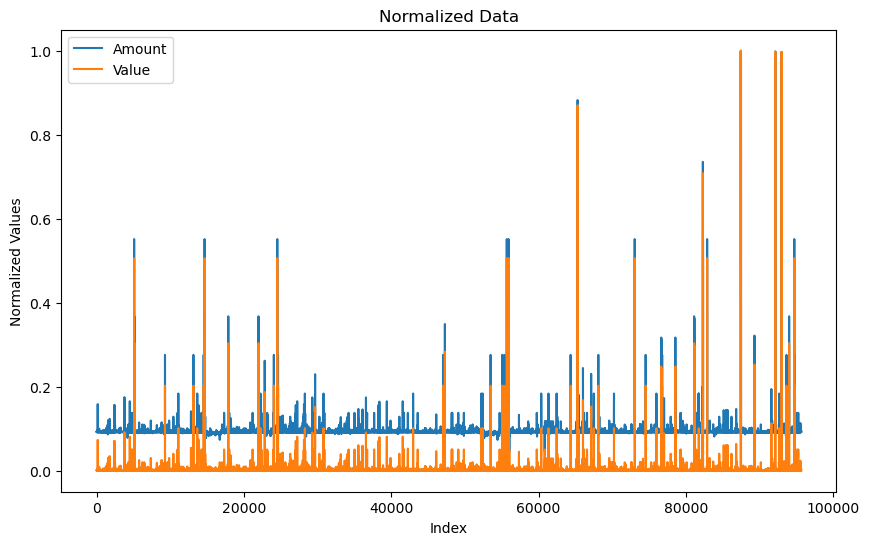

In [35]:

# Plotting the normalized data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(normalized_data.index, normalized_data['Amount'], label='Amount')
plt.plot(normalized_data.index, normalized_data['Value'], label='Value')
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.title('Normalized Data')
plt.legend()
plt.show()

In [33]:
# Display the standardized data
print("\nStandardized Data:")
print(standardized_data.head())


Standardized Data:
     Amount     Value
0 -0.046371 -0.072291
1 -0.054643 -0.080251
2 -0.050426 -0.076352
3  0.107717  0.096648
4 -0.059704 -0.075183


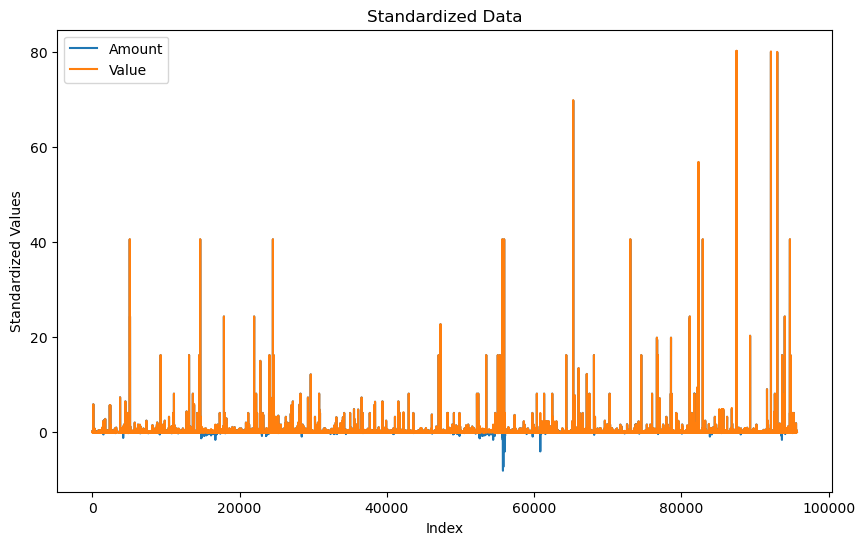

In [36]:
# Plotting the standardized data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(standardized_data.index, standardized_data['Amount'], label='Amount')
plt.plot(standardized_data.index, standardized_data['Value'], label='Value')
plt.xlabel('Index')
plt.ylabel('Standardized Values')
plt.title('Standardized Data')
plt.legend()
plt.show()